# Programming Exercise 1: Linear Regression

In [1]:
ls("ex1")
addpath("ex1")

computeCost.m		ex1data2.txt		normalEqn.m
computeCostMulti.m	featureNormalize.m	plotData.m
ex1.m			gradientDescent.m	submit.m
ex1_multi.m		gradientDescentMulti.m	token.mat
ex1data1.txt		lib			warmUpExercise.m


In [2]:
warmUpExercise() %function implemented%

ans =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1



Type returned from load command: matrix
ans =

   6.1101
   5.5277
   8.5186
   7.0032
   5.8598

ans =

   17.5920
    9.1302
   13.6620
   11.8540
    6.8233

Number of training instances: 97


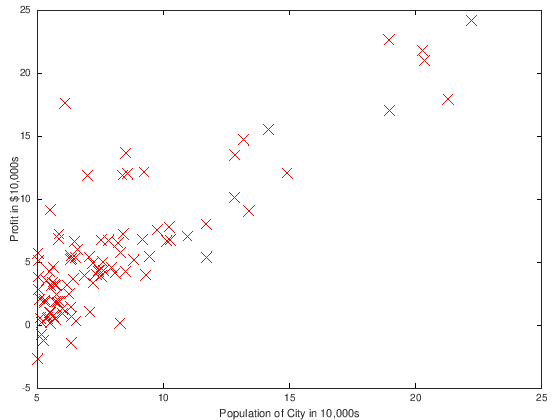

In [3]:
data = load('ex1data1.txt');
fprintf('Type returned from load command: %s', typeinfo(data));
X = data(:, 1); y = data(:, 2);
X(1:5)
y(1:5)
%{
fprintf('iterate over all rows of columns 1 and 2');
fprintf('X_i = data(:, 1) = %d y_i = data(:, 2) = %d\n', X, y);

Output
iterate over all rows of columns 1 and 2
X_i = data(:, 1) = 6.1101 y_i = data(:, 2) = 5.5277
X_i = data(:, 1) = 8.5186 y_i = data(:, 2) = 7.0032
X_i = data(:, 1) = 5.8598 y_i = data(:, 2) = 8.3829
X_i = data(:, 1) = 7.4764 y_i = data(:, 2) = 8.5781
...for the rest of the matrix instances
%}

m = length(y);
fprintf('Number of training instances: %d', m);
plotData(X, y); %function implemented%

In [4]:
%computing the cost given theta
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

sizeX = size(X)
sizeTheta = size(theta)
sizeY = size(y)

D = X*theta - y; %D is for diff vector

sizeD = size(D)

J = (D' * D) / (2*m)

sizeX =

   97    2

sizeTheta =

   2   1

sizeY =

   97    1

sizeD =

   97    1

J =  32.073


In [5]:
computeCost(X, y, theta) %function implemented%

ans =  32.073



Running Gradient Descent ...
Theta found by gradient descent:
-3.895702
1.193026
Expected theta values (approx)
 -3.6303
  1.1664



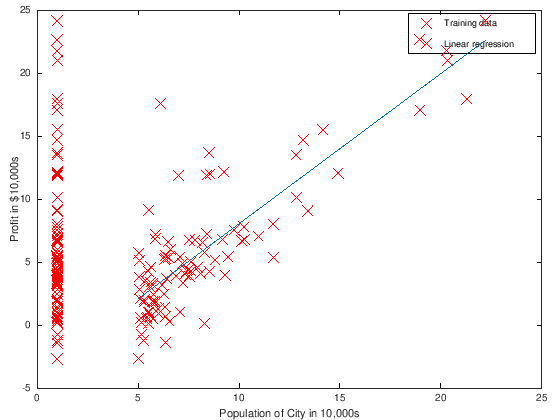

In [10]:
iterations = 1500;
alpha = 0.01;

fprintf('\nRunning Gradient Descent ...\n')
% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);
fprintf('Expected theta values (approx)\n');
fprintf(' -3.6303\n  1.1664\n\n');

% Plot the linear fit
plotData(X, y); %function implemented%
hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure

Visualizing J(theta_0, theta_1) ...


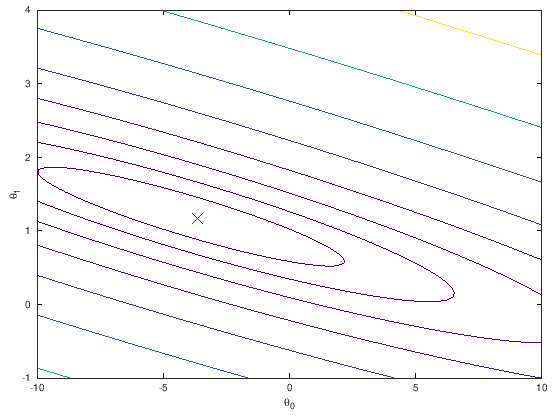

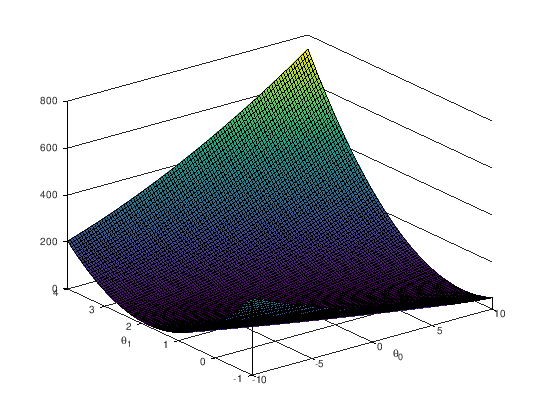

In [7]:
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
    t = [theta0_vals(i); theta1_vals(j)];
  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);